In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

from scipy.stats import pearsonr

In [2]:
SAVE_FIGURES = True

In [3]:
os.listdir("data")

['peptides_train_to_mic.csv',
 'tausw2_test.pkl',
 'peptides_w_mic_train.txt',
 'peptides_2024_cdhit90_unbalanced_test.txt',
 'peptides_predicted-log10mic_zScoreNormalized_train.txt',
 'initialization_sets.pkl',
 'vocab',
 'single_point_initialization.pkl',
 'peptides_w_mic_test.txt',
 'properties',
 'peptides_2024_cdhit90_unbalanced_train.txt',
 'twenty_point_initialization.pkl',
 'peptides_predicted-log10mic_zScoreNormalized_test.txt',
 'peptides_predicted_log10_mic_test.txt',
 'ten_point_initialization.pkl',
 'fifty_point_initialization.pkl',
 'char_dict_peptides_2024_cdhit90_unbalanced.pkl',
 'char_weights_peptides_2024_cdhit90_unbalanced.npy',
 'top10_predict_mic_features.pkl',
 'peptides_2024_cdhit90_unbalanced_train_function.txt',
 'peptides_predicted_log10_mic_train.txt',
 'peptides_2024_cdhit90_unbalanced_test_function.txt']

In [4]:
sequences_train = pd.read_csv("data/peptides_2024_cdhit90_unbalanced_train.txt")
sequences_test  = pd.read_csv("data/peptides_2024_cdhit90_unbalanced_test.txt")

ampness_train = pd.read_csv("data/peptides_2024_cdhit90_unbalanced_train_function.txt")
ampness_test  = pd.read_csv("data/peptides_2024_cdhit90_unbalanced_test_function.txt")


In [5]:
sequences_train.head(3)

,peptides
0,CREKA
1,RRWQW
2,RGRGR


In [7]:
SAVE_FIGURES=False

[0, 5, 20, 40, 60, 80, 100]


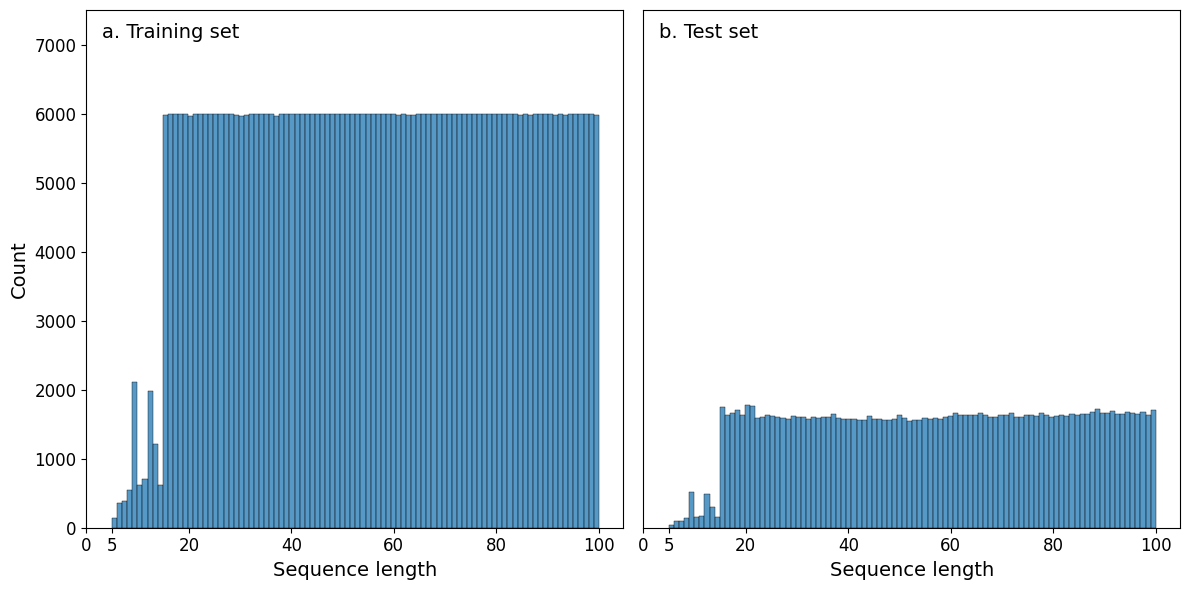

In [8]:
fig = plt.figure(figsize=(12,6))
grid = fig.add_gridspec(1,2)

for i, data in enumerate([sequences_train, sequences_test]):
    ax = fig.add_subplot(grid[i])
    ax = sns.histplot(
            data.peptides.str.len(), 
            bins=96,
            ax=ax
    )
    
    _xticks = [0,5,20,40,60,80,100]
    ax.set_xticks(_xticks)
    
    ax.set_ylim([0,7500])

    ax.set_xlabel("Sequence length", fontsize=14)

    ax.tick_params(labelsize=12)
    
    if i==1:
        ax.set_ylabel("")
        ax.tick_params(
            left=False,
            labelleft=False,
        )
        ax.text(x=3, y=7100, s="b. Test set", fontsize=14)
    else:
        ax.set_ylabel("Count", fontsize=14)
        ax.text(x=3, y=7100, s="a. Training set", fontsize=14)
fig.tight_layout()

if SAVE_FIGURES:
    fig.savefig("figures/histogram_of_dataset_sequence_lengths.pdf",dpi=300)
print(_xticks)

In [24]:
sequences_train["length"] = sequences_train.peptides.str.len()
sequences_test[ "length"] =  sequences_test.peptides.str.len()


In [10]:
ampness_train.head()

,amp
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


[0, 5, 20, 40, 60, 80, 100]


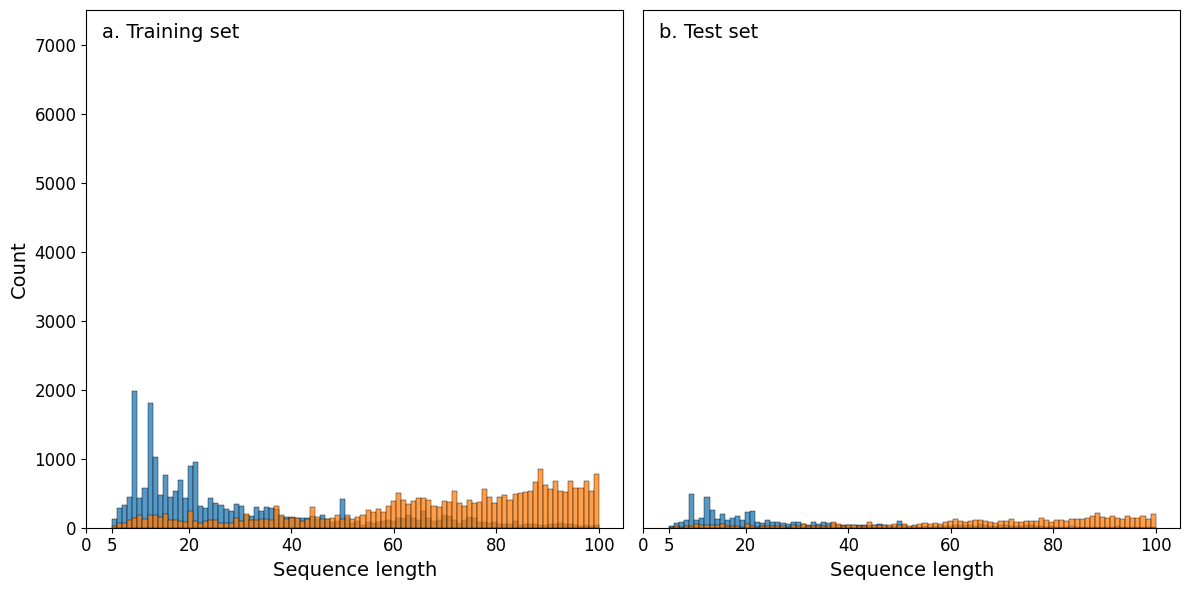

In [26]:
fig = plt.figure(figsize=(12,6))
grid = fig.add_gridspec(1,2)

for i, data in enumerate([sequences_train, sequences_test]):
    if i==0:
        _activity = ampness_train
    else:
        _activity = ampness_test
        
    ax = fig.add_subplot(grid[i])
    ax = sns.histplot(
            data.loc[_activity.amp==1].peptides.str.len(), 
            bins=96,
            ax=ax,
            label="AMP"
    )

    ax = sns.histplot(
            data.loc[_activity.amp==0].peptides.str.len(), 
            bins=96,
            ax=ax,
            label="not-AMP"
    )
    
    _xticks = [0,5,20,40,60,80,100]
    ax.set_xticks(_xticks)
    
    ax.set_ylim([0,7500])

    ax.set_xlabel("Sequence length", fontsize=14)

    ax.tick_params(labelsize=12)
    
    if i==1:
        ax.set_ylabel("")
        ax.tick_params(
            left=False,
            labelleft=False,
        )
        ax.text(x=3, y=7100, s="b. Test set", fontsize=14)
    else:
        ax.set_ylabel("Count", fontsize=14)
        ax.text(x=3, y=7100, s="a. Training set", fontsize=14)
fig.tight_layout()

if SAVE_FIGURES:
    fig.savefig("figures/histogram_of_dataset_sequence_lengths.pdf",dpi=300)
print(_xticks)

In [42]:
bch_properties = pd.read_csv("data/properties/peptides_2024_cdhit90_unbalanced_train_properties_zScoreNormalized.txt")
bch_properties_test = pd.read_csv("data/properties/peptides_2024_cdhit90_unbalanced_test_properties_zScoreNormalized.txt")

In [54]:
mask_rng_seed = 42

for i, mask_label_percent in enumerate([0,25,50,75,98]):
    mask_label_percent = mask_label_percent/100
    _generator = np.random.default_rng(mask_rng_seed)
    mask_labels = _generator.choice([True, False], size=(bch_properties.shape[0],1), p=[mask_label_percent, 1-mask_label_percent])

    print(f"label percentage = {round(1.0-mask_label_percent, 3)} | {bch_properties.shape[0] - np.sum(mask_labels)}/{bch_properties.shape[0]} number of labels")
# props[mask_labels] = np.nan

label percentage = 1.0 | 523848/523848 number of labels
label percentage = 0.75 | 392586/523848 number of labels
label percentage = 0.5 | 261647/523848 number of labels
label percentage = 0.25 | 130746/523848 number of labels
label percentage = 0.02 | 10538/523848 number of labels


In [55]:
10538/523848

0.020116522349994656